<a href="https://colab.research.google.com/github/AnhMcConnell/Tensorflow-2-and-Keras-Deep-Learning-Bootcamp/blob/main/classification_challenge_covid19_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview:

This project is slightly different than most on Codecademy. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements that describe the project you’ll be building. There are many possible ways to fulfill all of these requirements correctly, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.bold text

**Project Goals:**


You are a researcher in a hospital lab and are given the task to develop a learning model that supports doctors with diagnosing illnesses that affect patients’ lungs. At your disposal, you have a set X-ray lung scans with examples of patients who had either pneumonia, Covid-19, or no illness. Using the Keras module, you will create a classification model that outputs a diagnosis based on a patient’s X-ray scan. You hope this model can help doctors with the challenge of deciphering X-ray scans and open a dialogue between your research team and the medical staff to create learning models that are as effective and interpretable as possible.

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd


In [3]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving classification-challenge.zip to classification-challenge (2).zip


In [5]:
!unzip classification-challenge.zip

Archive:  classification-challenge.zip
replace classification-challenge/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: classification-challenge/.DS_Store  
replace __MACOSX/classification-challenge/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [6]:
import os

In [7]:
data_dir = 'classification-challenge'

In [8]:
os.listdir(data_dir)

['classification-challenge-solution',
 'classification-challenge-starter',
 '.DS_Store']

In [9]:
test_path = data_dir+'/classification-challenge-starter/Covid19-dataset/test/'
train_path = data_dir+'/classification-challenge-starter/Covid19-dataset/train/'

In [10]:
test_path

'classification-challenge/classification-challenge-starter/Covid19-dataset/test/'

In [11]:
os.listdir(test_path)[:3]

['Pneumonia', 'Covid', 'Normal']

In [12]:
os.listdir(train_path)[:3]

['Pneumonia', 'Covid', 'Normal']

In [13]:
os.listdir(train_path+'Pneumonia')[0]

'75.png'

In [14]:
os.listdir(train_path+'Covid')[0]

'32.png'

In [15]:
covid_xray = train_path+'Covid'+'/32.png'

In [16]:
covid_xray

'classification-challenge/classification-challenge-starter/Covid19-dataset/train/Covid/32.png'

In [17]:
from matplotlib.image import imread

In [18]:
# Lets read the image by imread
imread(covid_xray)

array([[[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0.

In [19]:
# Check the shape of an image with imread
imread(covid_xray).shape

(256, 256, 4)

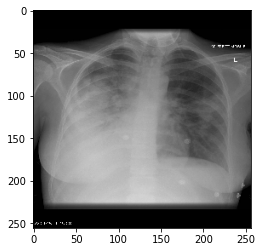

In [20]:
# Now, lets see how the person who has covid shows on xray
plt.imshow(imread(covid_xray))

In [21]:
# Similarly, lets see how xray shows on Pneumonia and normal 
os.listdir(train_path+'Normal')[0]

'125.png'

In [22]:
os.listdir(train_path+'Pneumonia')[0]

'75.png'

In [23]:
normal_xray = train_path+'Normal'+'/125.png'

In [24]:
pneu_xray = train_path+'Pneumonia'+'/75.png'

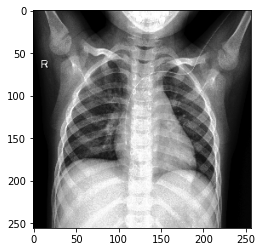

In [25]:
# Lets see the xray of normal patient
plt.imshow(imread(normal_xray))

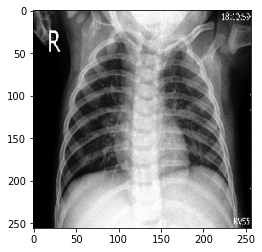

In [26]:
# Now, lets see the xray of pneumonia patient
plt.imshow(imread(pneu_xray))

In [27]:
imread(normal_xray).shape

(256, 256, 4)

In [28]:
imread(pneu_xray).shape

(256, 256, 4)

In [29]:
# So far we can see they have the same shape!!

In [30]:
# Lets check the len of each class
len(os.listdir(train_path+'Pneumonia'))

70

In [31]:
len(os.listdir(train_path+'Covid'))

111

In [32]:
len(os.listdir(train_path+'Normal'))

70

In [33]:
# So the covid class has more photos than the other two.

In [34]:
dim1 = []
dim2 = []

for image_file in os.listdir(test_path+'Covid'):
  img = imread(test_path+'Covid/'+image_file)
  d1, d2, color = img.shape
  dim1.append(d1)
  dim2.append(d2)


In [35]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


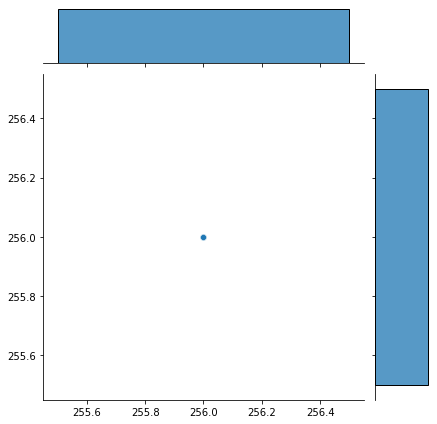

In [36]:
sns.jointplot(dim1, dim2)

In [37]:
# Ok, so all the photos have same dimension (256, 256, 4)

In [37]:
# Now, its time to generate our ImageDataGenerator
image_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

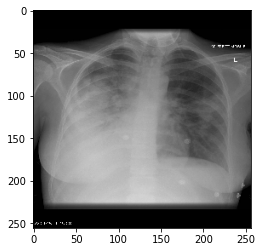

In [38]:
plt.imshow(imread(covid_xray))

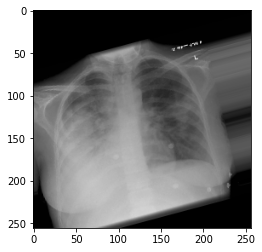

In [39]:
# Now, lets see the image generator applies to our covid xray
covid_img = imread(covid_xray)
plt.imshow(image_generator.random_transform(covid_img))

In [ ]:
train_cut = os.listdir(train_path)[:3]

In [ ]:
train_cut

['Pneumonia', 'Covid', 'Normal']

In [41]:
image_generator.flow_from_directory(train_path)

Found 251 images belonging to 3 classes.


In [42]:
image_generator.flow_from_directory(test_path)

Found 66 images belonging to 3 classes.


In [40]:
# generate Images from ImageDataGenerator
batch_size = 16

In [41]:
train_img_gen = image_generator.flow_from_directory(train_path,batch_size = batch_size,color_mode='grayscale', class_mode='sparse')


Found 251 images belonging to 3 classes.


In [111]:
test_img_gen = image_generator.flow_from_directory(test_path ,batch_size = batch_size,color_mode='grayscale', class_mode='sparse', shuffle=False)

Found 66 images belonging to 3 classes.


In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [45]:
from tensorflow.keras.models import Sequential

In [46]:
from tensorflow.keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Dropout, Input
from tensorflow.keras.optimizers import SGD

In [51]:
model = Sequential()

model.add(Input(shape=train_img_gen.image_shape))

model.add(Conv2D(filters=32, kernel_size=(3,3) activation='relu')) # Important note hee we have to chooose the input_shape as avarage shape that we defined earlier. 
model.add(MaxPool2D(pool_size=(2,2))) # (2,2) is default, we can play around with these shape

model.add(Conv2D(filters=64, kernel_size=(3,3) activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(784, activation='relu')) 
model.add(Dropout(0.5)) # Turn off half of the neurons randomly to prevent overfitting
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(3, activation='softmax')) 
# Compile model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 4)       40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 4)       0         
_________________________________________________________________
dense_2 (Dense)              (None, 127, 127, 64)      320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1032256)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3096771   
Total params: 3,097,131
Trainable params: 3,097,131
Non-trainable params: 0
____________________________________________

In [53]:
train_img_gen.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

In [54]:
model.fit(train_img_gen, epochs=1000, validation_data=test_img_gen, callbacks=[early_stop])

Epoch 1/1000
16/16 [==============================] - 5s 151ms/step - loss: 2593.4594 - accuracy: 0.4468 - val_loss: 952.0900 - val_accuracy: 0.6061
Epoch 2/1000
16/16 [==============================] - 2s 137ms/step - loss: 854.5149 - accuracy: 0.6466 - val_loss: 1037.9054 - val_accuracy: 0.6212
Epoch 3/1000
16/16 [==============================] - 2s 136ms/step - loss: 553.2048 - accuracy: 0.7221 - val_loss: 795.7397 - val_accuracy: 0.6061
Epoch 4/1000
16/16 [==============================] - 2s 134ms/step - loss: 595.3432 - accuracy: 0.6865 - val_loss: 383.8195 - val_accuracy: 0.6667
Epoch 5/1000
16/16 [==============================] - 2s 134ms/step - loss: 370.8763 - accuracy: 0.7022 - val_loss: 340.3862 - val_accuracy: 0.6818
Epoch 6/1000
16/16 [==============================] - 2s 134ms/step - loss: 269.6357 - accuracy: 0.7690 - val_loss: 264.2175 - val_accuracy: 0.6667
Epoch 7/1000
16/16 [==============================] - 2s 134ms/step - loss: 155.6032 - accuracy: 0.8019 - val_

Evaluate model

In [55]:
model.metrics_names

['loss', 'accuracy']

In [56]:
losses = pd.DataFrame(model.history.history)

In [57]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1966.760498,0.490040,952.090027,0.606061
1,717.248718,0.657371,1037.905396,0.621212
2,411.929108,0.752988,795.739685,0.606061
3,465.005890,0.729084,383.819550,0.666667
4,367.813690,0.697211,340.386200,0.681818


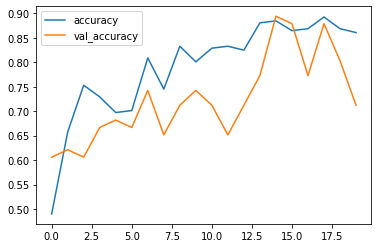

In [58]:
losses[['accuracy','val_accuracy']].plot()

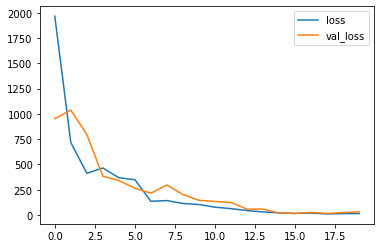

In [59]:
losses[['loss', 'val_loss']].plot()

In [60]:
print(model.metrics_names)
print(model.evaluate(test_img_gen))

['loss', 'accuracy']
5/5 [==============================] - 0s 80ms/step - loss: 25.7854 - accuracy: 0.7727
[25.78544807434082, 0.7727272510528564]


In [61]:
pred = model.predict(test_img_gen)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
early_stop = EarlyStopping(monitor='val_loss', patience=4)

In [112]:
model = Sequential()
model.add(Input(shape=train_img_gen.image_shape))
model.add(Conv2D(4, 3, activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [113]:
model.fit(train_img_gen, epochs=1000, batch_size=4, validation_data=test_img_gen, callbacks=[early_stop])

Epoch 1/1000
16/16 [==============================] - 3s 144ms/step - loss: 816.3870 - accuracy: 0.4014 - val_loss: 770.1070 - val_accuracy: 0.5606
Epoch 2/1000
16/16 [==============================] - 2s 129ms/step - loss: 379.5684 - accuracy: 0.7230 - val_loss: 402.4421 - val_accuracy: 0.6818
Epoch 3/1000
16/16 [==============================] - 2s 129ms/step - loss: 325.8882 - accuracy: 0.6145 - val_loss: 279.5434 - val_accuracy: 0.6061
Epoch 4/1000
16/16 [==============================] - 2s 128ms/step - loss: 90.7837 - accuracy: 0.8178 - val_loss: 190.0894 - val_accuracy: 0.6970
Epoch 5/1000
16/16 [==============================] - 2s 130ms/step - loss: 91.6659 - accuracy: 0.8123 - val_loss: 127.6181 - val_accuracy: 0.7424
Epoch 6/1000
16/16 [==============================] - 2s 131ms/step - loss: 76.9017 - accuracy: 0.8250 - val_loss: 199.4226 - val_accuracy: 0.5909
Epoch 7/1000
16/16 [==============================] - 2s 129ms/step - loss: 124.1241 - accuracy: 0.7185 - val_loss:

In [114]:
print(model.metrics_names)
print(model.evaluate(test_img_gen))

['loss', 'accuracy']
5/5 [==============================] - 0s 86ms/step - loss: 8.3199 - accuracy: 0.8636
[8.319869041442871, 0.8636363744735718]


In [115]:
y_preds = model.predict(test_img_gen)

In [116]:
y_preds = np.argmax(y_preds, axis=1)

In [117]:
print(classification_report(test_img_gen.classes, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.74      0.85      0.79        20
           2       0.68      0.65      0.67        20

    accuracy                           0.76        66
   macro avg       0.75      0.76      0.75        66
weighted avg       0.76      0.76      0.76        66



In [119]:
model = Sequential()

model.add(Input(shape=train_img_gen.image_shape))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(784, activation='relu')) 
model.add(Dropout(0.5)) # Turn off half of the neurons randomly to prevent overfitting
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(3, activation='softmax')) 
# Compile model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [120]:
model.fit(train_img_gen, epochs=1000, batch_size=16, validation_data=test_img_gen, callbacks=[early_stop])

Epoch 1/1000
16/16 [==============================] - 3s 169ms/step - loss: 723.8983 - accuracy: 0.4070 - val_loss: 1.5637 - val_accuracy: 0.6667
Epoch 2/1000
16/16 [==============================] - 2s 155ms/step - loss: 2.2896 - accuracy: 0.5377 - val_loss: 1.1517 - val_accuracy: 0.6515
Epoch 3/1000
16/16 [==============================] - 2s 153ms/step - loss: 1.1039 - accuracy: 0.6071 - val_loss: 0.8753 - val_accuracy: 0.6667
Epoch 4/1000
16/16 [==============================] - 2s 153ms/step - loss: 0.8168 - accuracy: 0.6848 - val_loss: 0.7736 - val_accuracy: 0.7576
Epoch 5/1000
16/16 [==============================] - 2s 155ms/step - loss: 0.8183 - accuracy: 0.6511 - val_loss: 0.7820 - val_accuracy: 0.7576
Epoch 6/1000
16/16 [==============================] - 2s 153ms/step - loss: 0.7506 - accuracy: 0.7265 - val_loss: 0.8008 - val_accuracy: 0.7121
Epoch 7/1000
16/16 [==============================] - 2s 155ms/step - loss: 0.7991 - accuracy: 0.7276 - val_loss: 0.6635 - val_accurac

In [121]:
print(model.metrics_names)
print(model.evaluate(test_img_gen))

['loss', 'accuracy']
5/5 [==============================] - 0s 83ms/step - loss: 0.4870 - accuracy: 0.8333
[0.48697975277900696, 0.8333333134651184]


In [122]:
y_preds = model.predict(test_img_gen)

In [123]:
y_preds = np.argmax(y_preds, axis=1)

In [124]:
print(classification_report(test_img_gen.classes, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.61      0.70      0.65        20
           2       0.74      0.70      0.72        20

    accuracy                           0.74        66
   macro avg       0.74      0.74      0.74        66
weighted avg       0.75      0.74      0.75        66



In [125]:
confusion_matrix(test_img_gen.classes, y_preds)

array([[21,  5,  0],
       [ 1, 14,  5],
       [ 2,  4, 14]])

In [139]:
# Not bad at all.
# Now I want to predict a single image

from tensorflow.keras.preprocessing import image

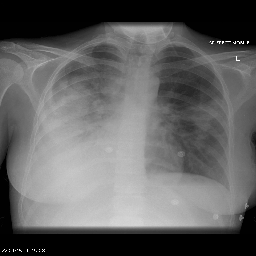

In [140]:
image.load_img(covid_xray)

In [177]:
single_img = image.load_img(covid_xray, grayscale=True, target_size=(256,256))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


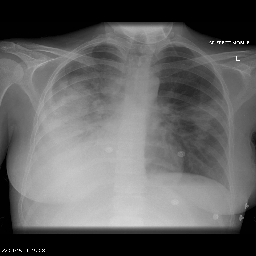

In [178]:
single_img

In [179]:
train_img_gen.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

In [180]:
single_img = image.img_to_array(single_img)

In [181]:
single_img.shape

(256, 256, 1)

In [182]:
train_img_gen.image_shape

(256, 256, 1)

In [183]:
single_img = np.expand_dims(single_img, axis=0)

In [189]:
single_img = single_img.reshape(1,256, 256, 1)

In [196]:
single_img.shape

(1, 256, 256, 1)

In [199]:
model.predict(single_img).all()

True